In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
csv_file = "BikeRidersInfoSheet.csv"
df = pd.read_csv(csv_file)

In [3]:
df.head(5)

,rider_id,date,location,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,peak_bonus,waiting_earnings,fuel_cost,idle_minutes,work_hours,customer_rating,avg_speed_kmph,network_downtime
0,R991MA,2025-07-01,Delhi,18.0,16.0,0.0,0.0,73.10,16.54,726.60,100.0,31.96,224.39,51.0,6.71,4.41,23.11,2.0
1,R991MA,2025-07-02,Delhi,8.0,6.0,3.0,1.0,39.63,9.57,321.33,0.0,8.80,123.15,98.0,3.97,4.53,28.26,5.0
2,R991MA,2025-07-03,Delhi,16.0,14.0,2.0,1.0,70.12,8.51,854.04,100.0,22.91,196.84,42.0,5.47,4.84,26.91,5.0
3,R991MA,2025-07-04,Delhi,10.0,9.0,0.0,0.0,48.21,6.86,408.44,80.0,12.62,137.84,69.0,4.38,4.84,25.24,4.0
4,R991MA,2025-07-05,Delhi,24.0,15.0,1.0,0.0,87.75,7.13,925.68,120.0,26.70,237.52,48.0,6.60,4.31,27.46,5.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31000 entries, 0 to 30999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              31000 non-null  object 
 1   date                  31000 non-null  object 
 2   location              31000 non-null  object 
 3   rides                 26468 non-null  float64
 4   on_time_rides         26468 non-null  float64
 5   cancelled_rides       26468 non-null  float64
 6   missed_rides          26468 non-null  float64
 7   distance_km           26468 non-null  float64
 8   overhead_distance_km  26468 non-null  float64
 9   earnings              26468 non-null  float64
 10  peak_bonus            26468 non-null  float64
 11  waiting_earnings      26468 non-null  float64
 12  fuel_cost             26468 non-null  float64
 13  idle_minutes          26468 non-null  float64
 14  work_hours            26468 non-null  float64
 15  customer_rating    

In [5]:
np.sum(df.isna())

c:\Users\conta\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


rider_id                   0
date                       0
location                   0
rides                   4532
on_time_rides           4532
cancelled_rides         4532
missed_rides            4532
distance_km             4532
overhead_distance_km    4532
earnings                4532
peak_bonus              4532
waiting_earnings        4532
fuel_cost               4532
idle_minutes            4532
work_hours              4532
customer_rating         4532
avg_speed_kmph          4532
network_downtime        4532
dtype: int64

In [6]:
df.columns

Index(['rider_id', 'date', 'location', 'rides', 'on_time_rides',
       'cancelled_rides', 'missed_rides', 'distance_km',
       'overhead_distance_km', 'earnings', 'peak_bonus', 'waiting_earnings',
       'fuel_cost', 'idle_minutes', 'work_hours', 'customer_rating',
       'avg_speed_kmph', 'network_downtime'],
      dtype='object')

In [7]:
round(df.describe(), 2)

,rides,on_time_rides,cancelled_rides,missed_rides,distance_km,overhead_distance_km,earnings,peak_bonus,waiting_earnings,fuel_cost,idle_minutes,work_hours,customer_rating,avg_speed_kmph,network_downtime
count,26468.00,26468.00,26468.00,26468.0,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00,26468.00
mean,15.12,11.27,1.36,1.1,64.56,9.47,635.65,78.30,17.38,168.08,48.86,5.16,4.45,24.31,3.31
std,5.69,4.45,1.06,0.9,19.10,6.39,203.07,37.53,8.17,56.48,16.34,1.39,0.26,2.85,2.56
min,7.00,4.00,0.00,0.0,26.87,0.43,224.07,0.00,3.86,61.12,20.00,2.30,4.00,20.00,0.00
25%,11.00,8.00,0.00,0.0,48.98,4.52,477.76,80.00,11.36,124.81,37.00,4.11,4.22,21.79,1.00
50%,14.00,10.00,1.00,1.0,63.78,8.31,614.29,80.00,15.69,161.16,47.00,4.94,4.45,24.00,3.00
75%,18.00,14.00,2.00,2.0,76.59,13.03,760.51,100.00,21.66,201.87,58.00,5.94,4.67,26.65,5.00
max,28.00,25.00,3.00,3.0,118.05,33.59,1378.08,120.00,53.84,401.51,100.00,10.47,4.90,30.00,10.00


In [8]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [12]:
def getUniqueValues(*columnNames):
    """Unique values of all given columns"""
    for columnName in columnNames:
        unique_values = df[columnName].unique()
        unique_values_string = ", ".join(([str(val) for val in unique_values]))
        unique_count = len(unique_values)
        print(f"\nColumn: {columnName}")
        print(f"Unique Values: {unique_values_string}")
        print(f"Total Count: {unique_count}")

In [13]:
getUniqueValues(
    "location", "cancelled_rides", "missed_rides", "peak_bonus", "network_downtime"
)


Column: location
Unique Values: Delhi, Chennai, Hyderabad, Mumbai, Bangaluru, Kolkata
Total Count: 6

Column: cancelled_rides
Unique Values: 0.0, 3.0, 2.0, 1.0, nan
Total Count: 5

Column: missed_rides
Unique Values: 0.0, 1.0, nan, 2.0, 3.0
Total Count: 5

Column: peak_bonus
Unique Values: 100.0, 0.0, 80.0, 120.0, nan
Total Count: 5

Column: network_downtime
Unique Values: 2.0, 5.0, 4.0, nan, 3.0, 0.0, 1.0, 7.0, 8.0, 9.0, 6.0, 10.0
Total Count: 12


In [ ]:
# Column aggregations
df_grouped = (
    df.drop(columns=["date", "location", "customer_rating"])
    .groupby("rider_id")
    .sum()
    .reset_index()
)

# Customer rating as mean per rider
df_grouped["customer_rating"] = (
    df.groupby("rider_id")["customer_rating"].mean().values.round(2)
)

# Days worked as number of rows per rider
df_grouped["days_worked"] = df.groupby("rider_id").size().values

# Step 5: Add on-time ride percentage
df_grouped["on_time_rides_percentage"] = (
    100 * df_grouped["on_time_rides"] / df_grouped["rides"]
).round(2)

# Step 6: Add most common location per rider (mode)
df_grouped["location"] = (
    df.groupby("rider_id")["location"]
)

SyntaxError: cannot assign to attribute here. Maybe you meant '==' instead of '='? (4081727893.py, line 3)

In [100]:
def plot_rider_metrics(df, metric_col, n_top=15, title_suffix=""):
    """
    Generates two beautiful plots for a specified metric:
    1. Distribution of the metric across all 500 riders (Histogram/KDE).
    2. Comparison bar chart of the Top N riders by that metric.
    """

    # 1. Distribution Plot (Histogram/KDE)
    plt.figure(figsize=(10, 6))

    # Choose plot based on metric type
    if metric_col == "customer_rating":
        # Use a density plot for ratings
        sns.histplot(df[metric_col], kde=True, bins=20, color="teal")
        plt.title(
            f'Distribution of Average Rider {metric_col.replace("_", " ").title()} {title_suffix}',
            fontsize=16,
        )
    else:
        # Use a histogram for count/sum metrics
        sns.histplot(df[metric_col], kde=True, bins=30, color="darkorange")
        plt.title(
            f'Distribution of Total Rider {metric_col.replace("_", " ").title()} {title_suffix}',
            fontsize=16,
        )

    plt.xlabel(metric_col.replace("_", " ").title(), fontsize=12)
    plt.ylabel("Number of Riders", fontsize=12)
    plt.show()

    # 2. Top N Comparison Bar Chart
    df_sorted = df.sort_values(by=metric_col, ascending=False).head(n_top)

    plt.figure(figsize=(12, 7))
    # Use a smooth bar plot with rider_id on the x-axis
    ax = sns.barplot(
        x="rider_id",
        y=metric_col,
        data=df_sorted,
        palette=sns.color_palette("rocket", n_top),
        edgecolor="black",
        linewidth=0.5,
    )

    plt.title(
        f'Top {n_top} Riders by Total {metric_col.replace("_", " ").title()} {title_suffix}',
        fontsize=16,
    )
    plt.xlabel("Rider ID", fontsize=12)
    plt.ylabel(f'Total {metric_col.replace("_", " ").title()}', fontsize=12)
    plt.xticks(rotation=45, ha="right", fontsize=9)  # Rotate labels for readability

    # Add values on top of bars
    for p in ax.patches:
        ax.annotate(
            f"{p.get_height():.0f}",
            (p.get_x() + p.get_width() / 2.0, p.get_height()),
            ha="center",
            va="center",
            xytext=(0, 9),
            textcoords="offset points",
            fontsize=8,
        )

    plt.tight_layout()
    plt.show()

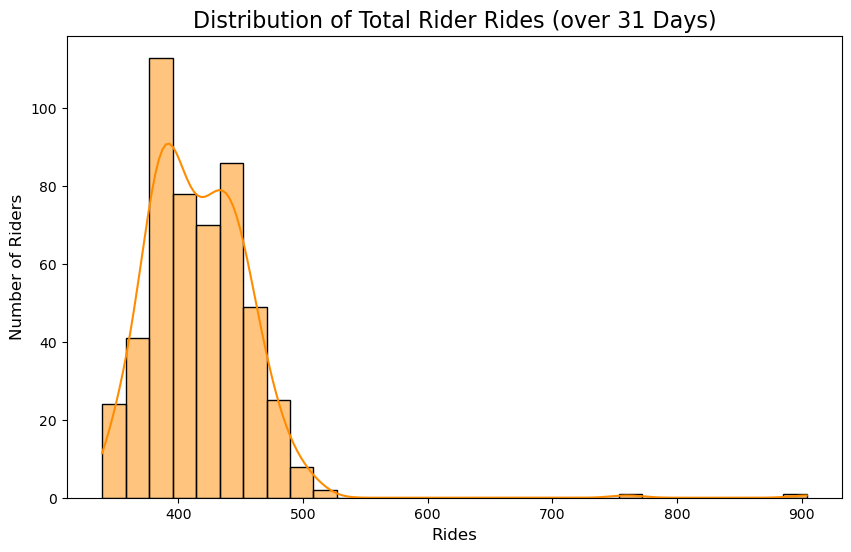

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


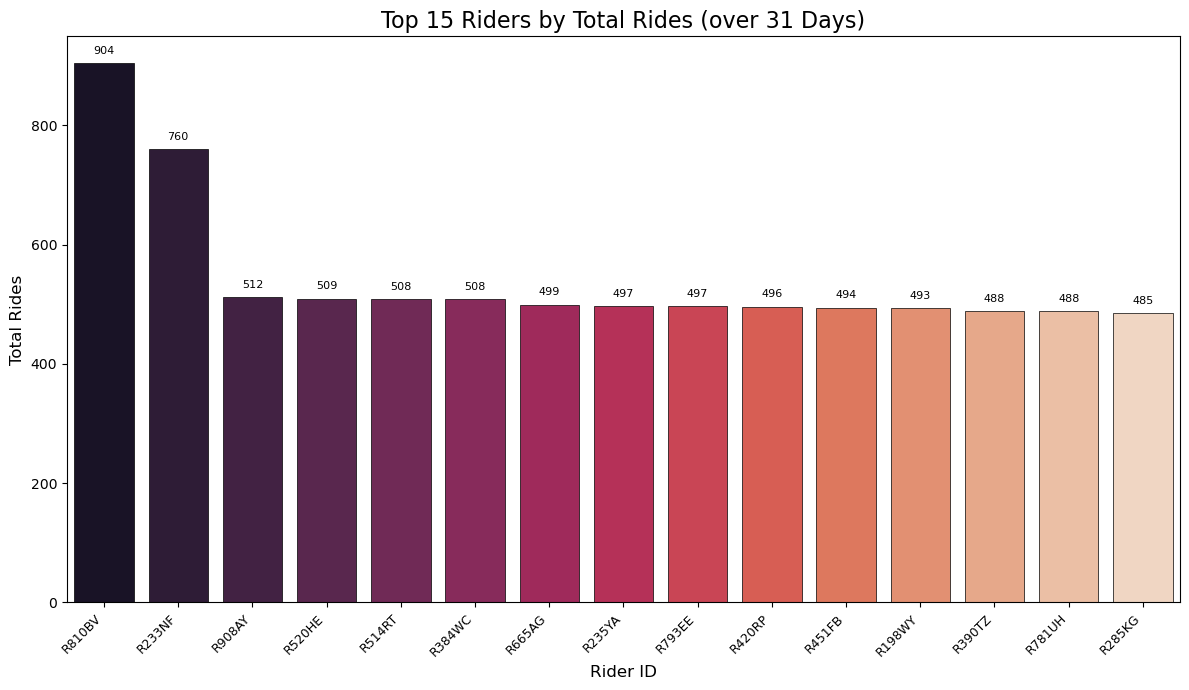

In [101]:
plot_rider_metrics(df_grouped, metric_col="rides", title_suffix="(over 31 Days)")

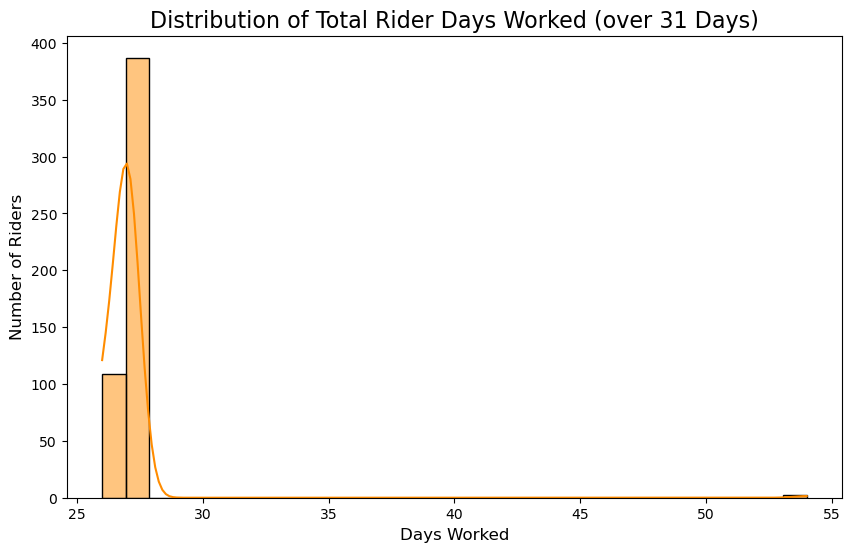

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


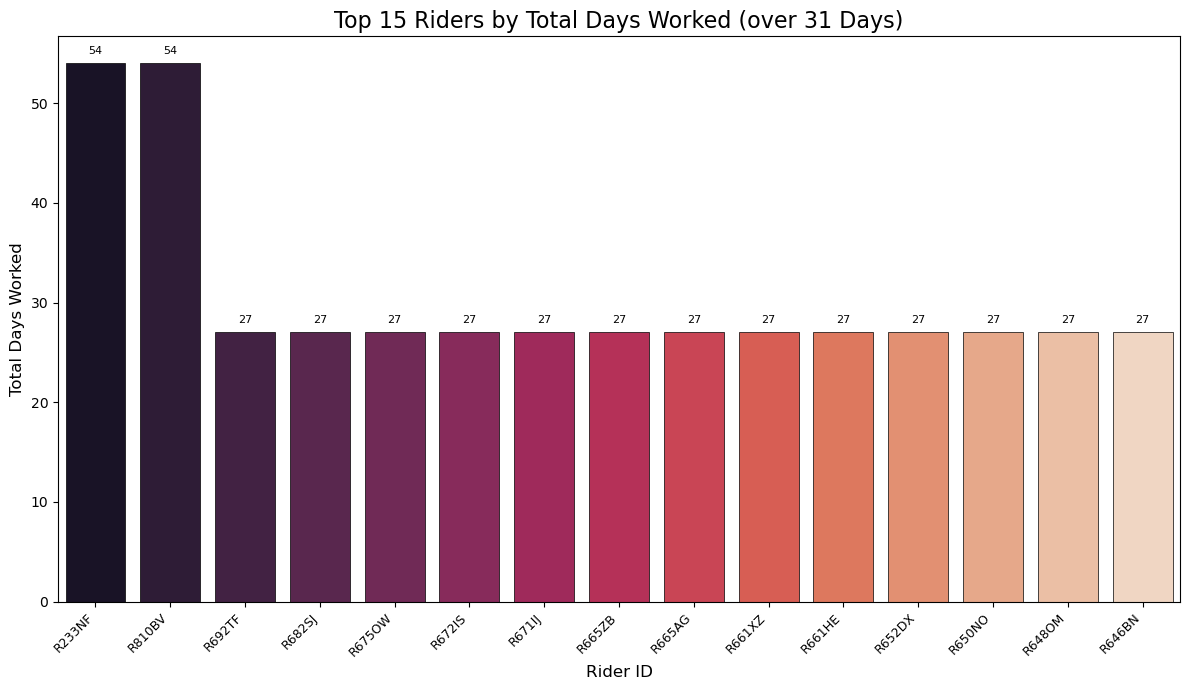

In [102]:
plot_rider_metrics(df_grouped, metric_col="days_worked", title_suffix="(over 31 Days)")

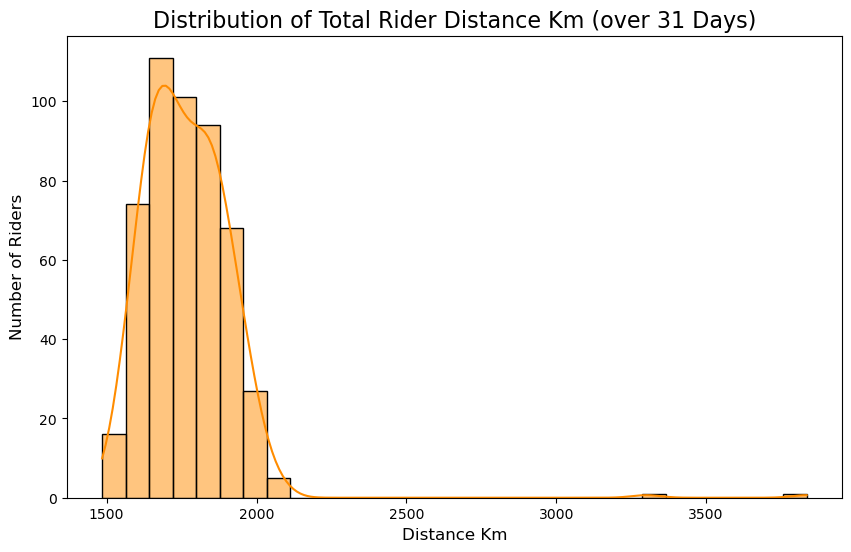

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


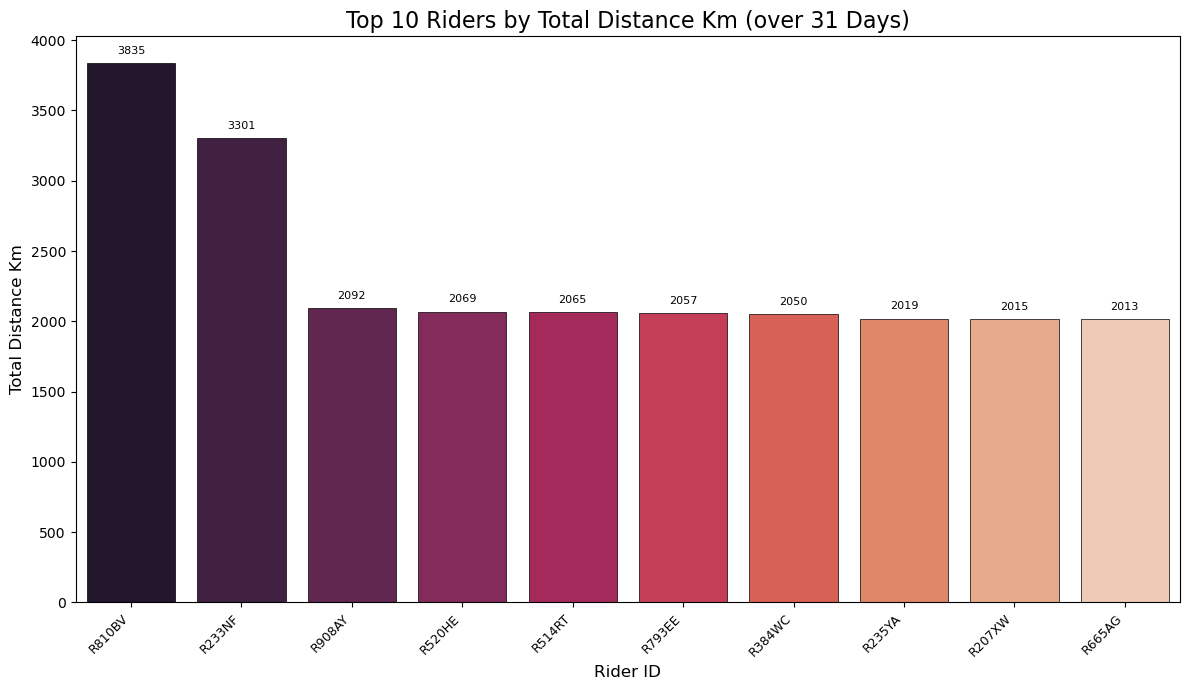

In [103]:
plot_rider_metrics(
    df_grouped, metric_col="distance_km", title_suffix="(over 31 Days)", n_top=10
)

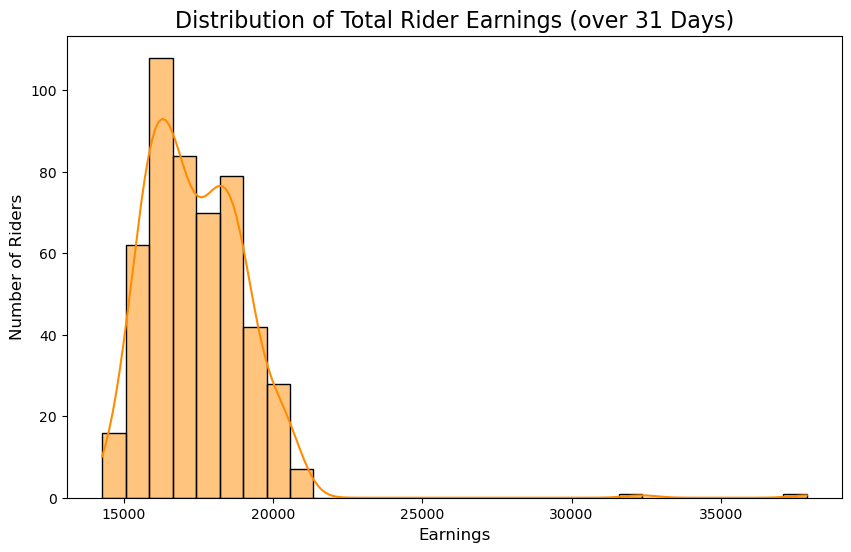

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


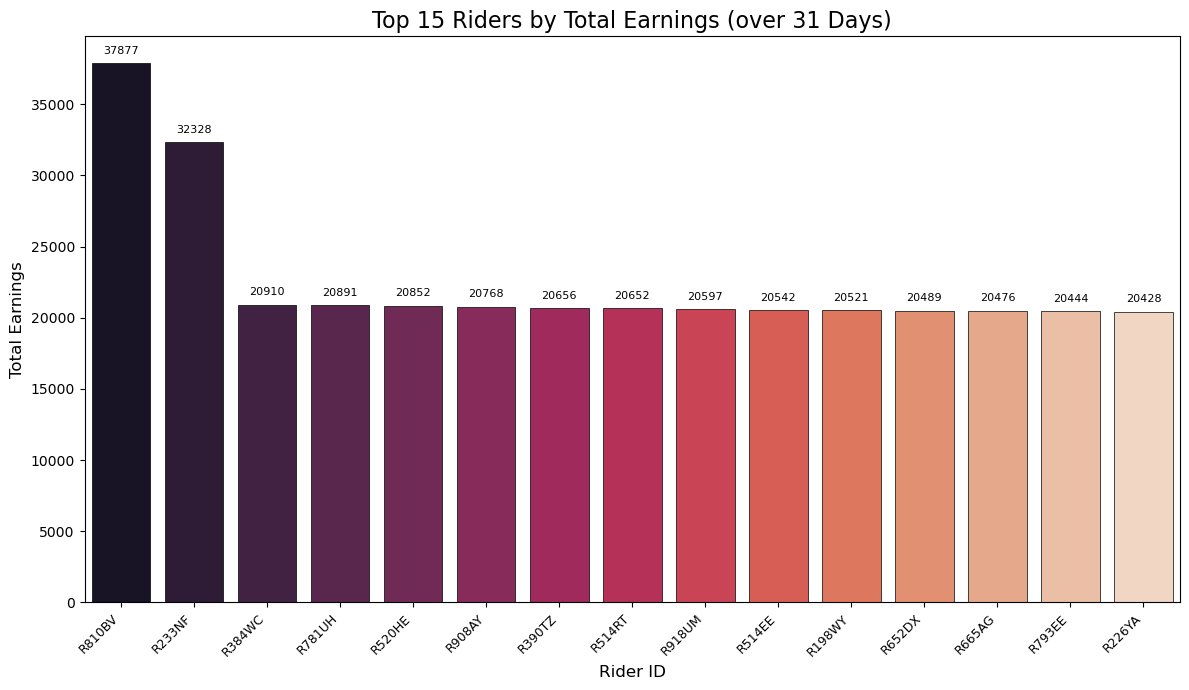

In [104]:
plot_rider_metrics(df_grouped, metric_col="earnings", title_suffix="(over 31 Days)")

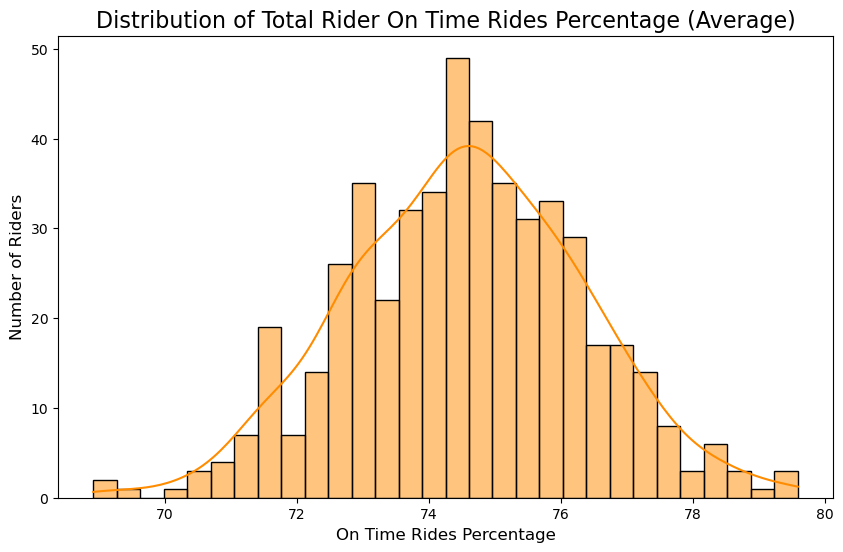

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


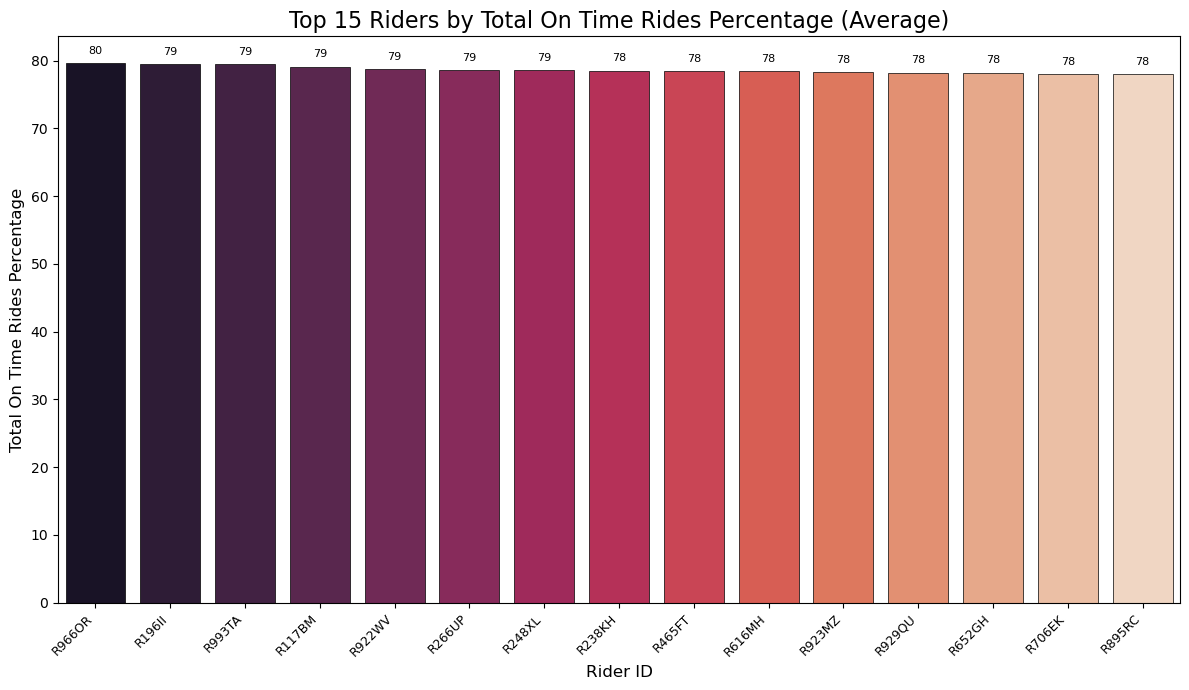

In [105]:
plot_rider_metrics(
    df_grouped, metric_col="on_time_rides_percentage", title_suffix="(Average)"
)

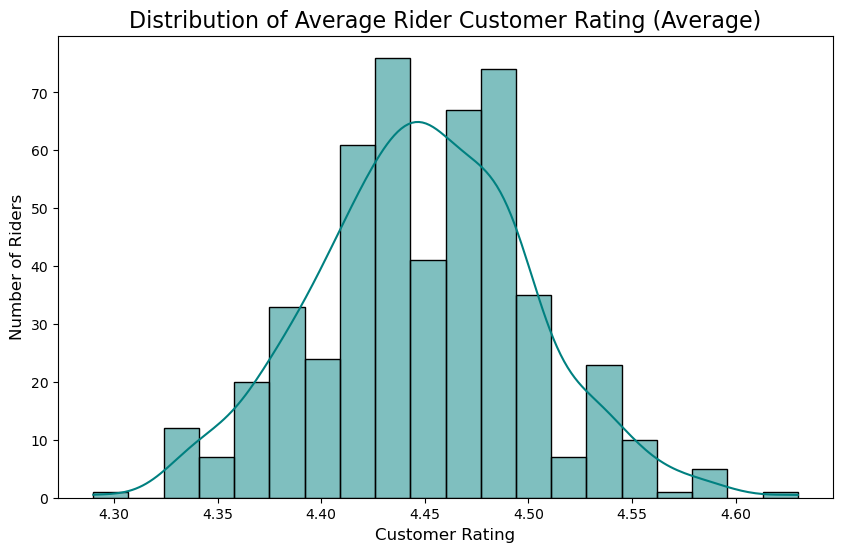

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


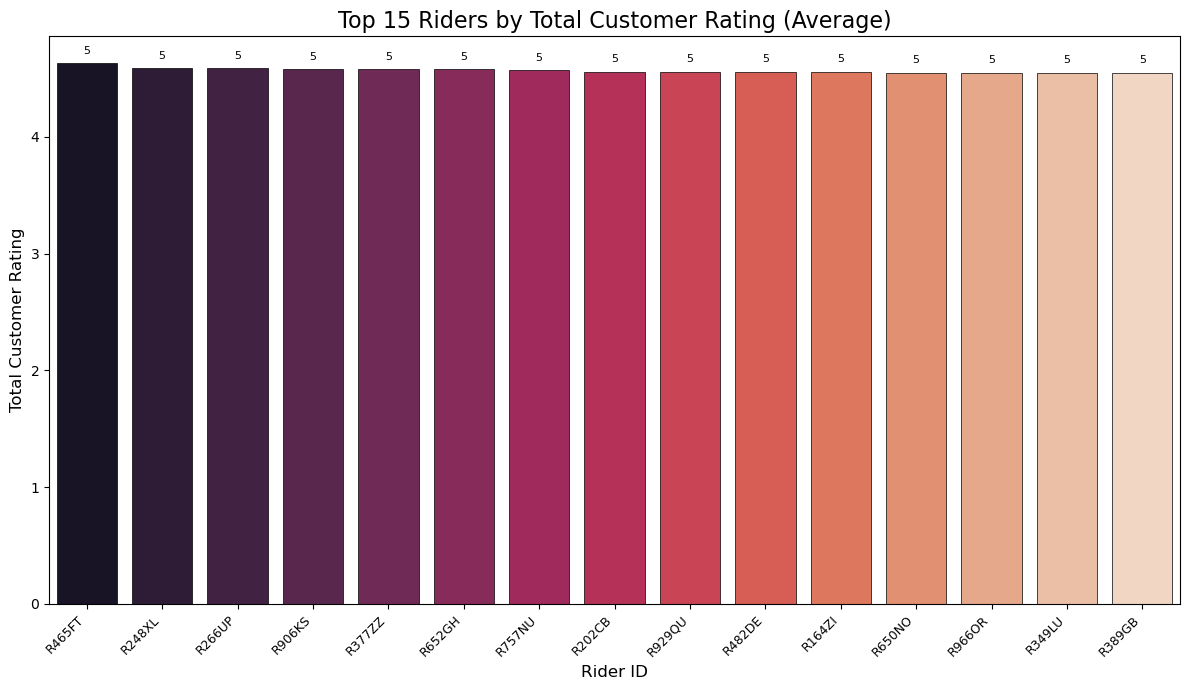

In [106]:
plot_rider_metrics(df_grouped, metric_col="customer_rating", title_suffix="(Average)")

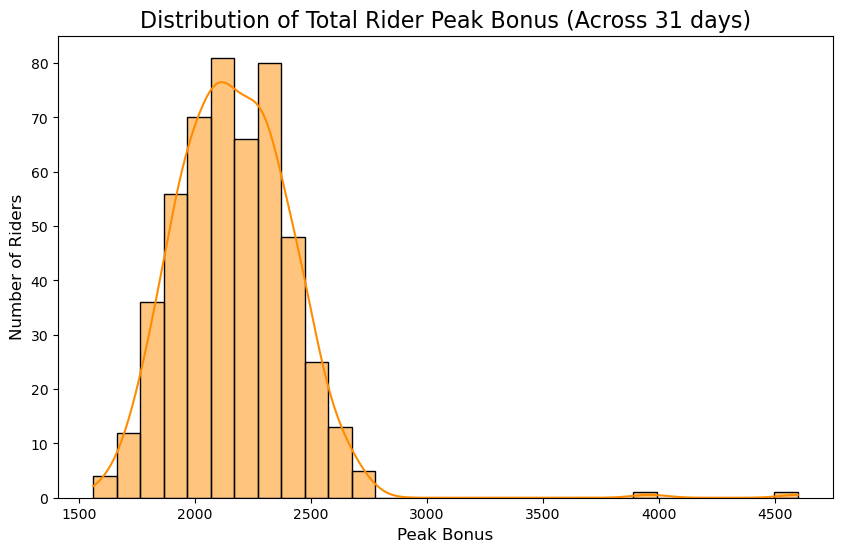

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


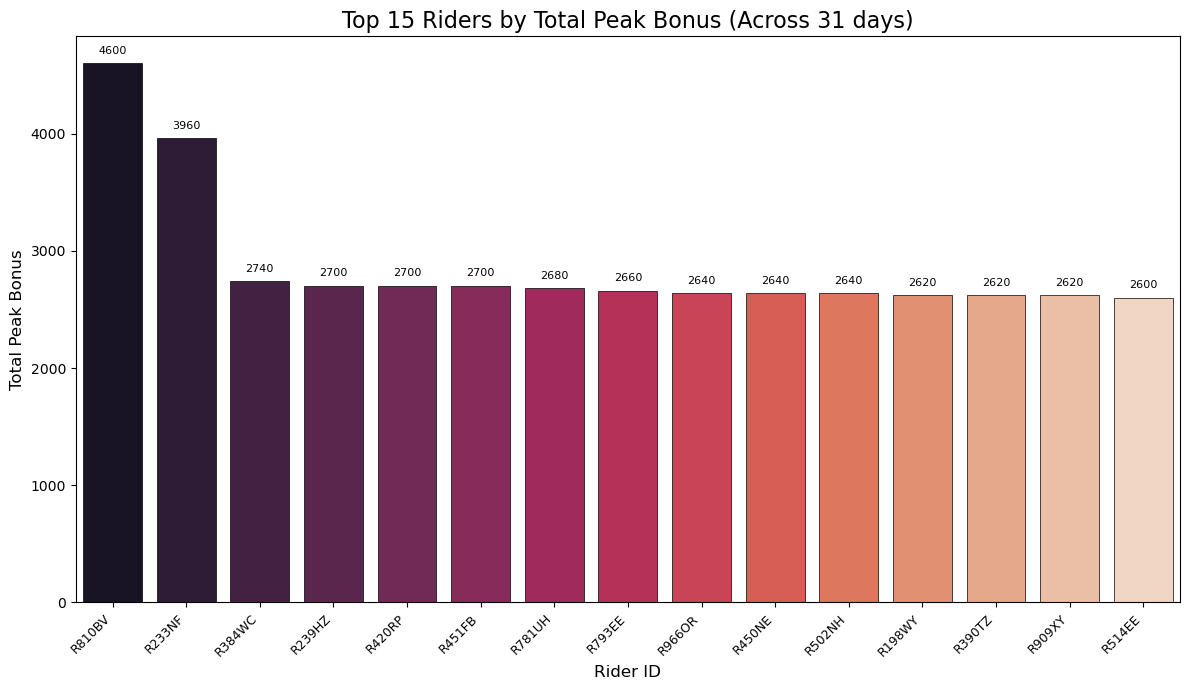

In [107]:
plot_rider_metrics(df_grouped, metric_col="peak_bonus", title_suffix="(Across 31 days)")

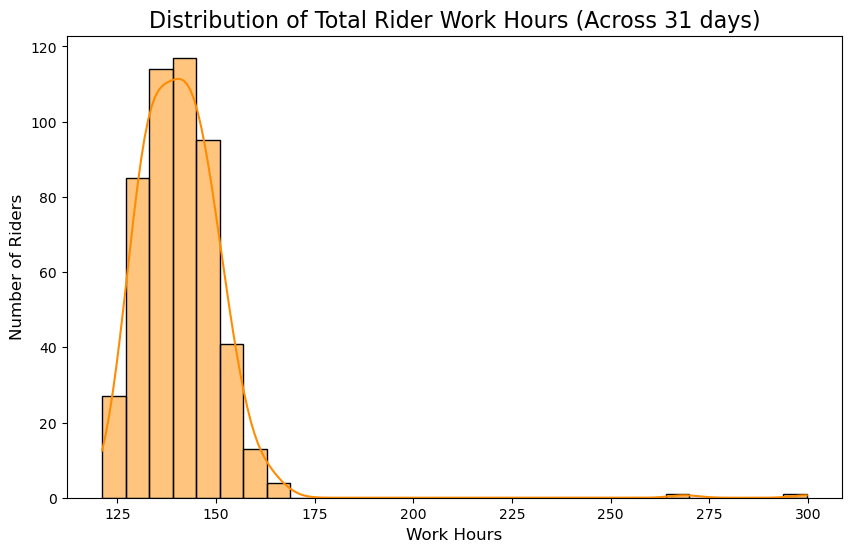

C:\Users\conta\AppData\Local\Temp\ipykernel_17388\3014038962.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


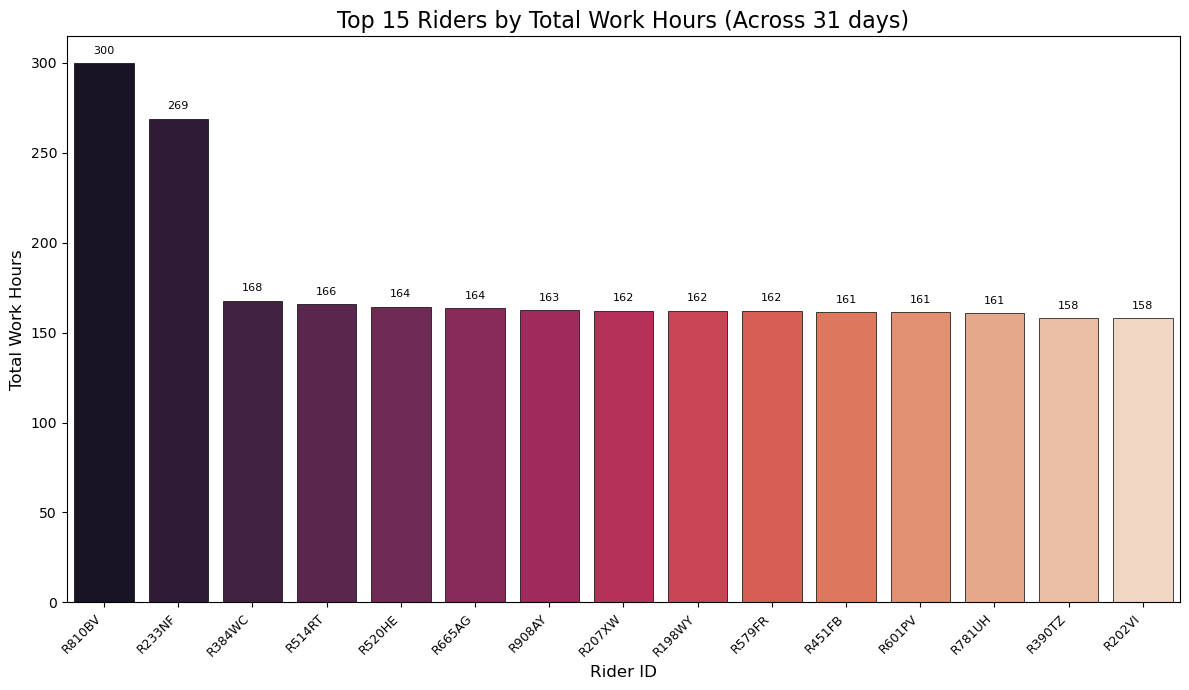

In [108]:
plot_rider_metrics(df_grouped, metric_col="work_hours", title_suffix="(Across 31 days)")

In [109]:
# Extract week number and day of week
df["week"] = (
    df["date"].dt.isocalendar().week
)  # or use .dt.strftime("%U") for 0-based week
df["day_name"] = df["date"].dt.day_name()

# Group by week + day
weekly_daywise = df.groupby(["week", "day_name"])["rides"].sum().unstack().fillna(0)

print(weekly_daywise)

day_name  Friday  Monday  Saturday   Sunday  Thursday  Tuesday  Wednesday
week                                                                     
31        6245.0     0.0    9558.0  11467.0       0.0      0.0        0.0
32        6238.0  6225.0    9264.0  11470.0    3195.0   6260.0     2994.0
33        6278.0  6083.0    9254.0  11515.0    4790.0   4580.0     3271.0
34        6159.0  5468.0    9385.0  10386.0    5589.0   3941.0     3888.0
35        6261.0  4760.0    9012.0   9559.0    5972.0   3831.0     4726.0
